![SEC logo](https://github.com/MarionMcG/Images/blob/master/sec.jpeg?raw=true)

# Dataset Simulation

In [3]:
import pandas as pd #For Data Manipulation
import numpy as np #For Numerical calculations
import matplotlib.pyplot as plt #For graphical representatibons
import seaborn as sns #For graphical representations
%matplotlib inline

## Investigating SEC Data

I took some summary statistics from the State Examinations Commission and put that data into a CSV file. This file contains the 2018 Leaving Cert Higher, Ordinary and Foundation Level results by gender, in Maths and English. I initially compared results in different subjects by gender, before settling on Leaving Cert Ordinary Level Maths. 

I am very familiar with the Leaving Cert Maths course and the factors influencing students attainment. I plan to investigate these factors, and simulate data to determine if my experiences and current research can be modelled effectively.

In [3]:
#Read SEC Data
df = pd.read_csv('data/2018lc-math-english.csv')
#Select Rows 8 to 15 and Columns 0 to 5
y = df.loc[8:15]
y = y.iloc[:, 0:5]

#Get rid of the existing index and replace with 1 to 9
#Now the index will match grade categories 
y = y.reset_index(drop = True)
y = y.set_index(np.arange(1, 9))
y #Show df table

,Grade,Level,2018-total-maths,2018-female-maths,2018-male-maths
1,1,O,482,314,168
2,2,O,3392,1979,1413
3,3,O,6484,3524,2960
4,4,O,7551,3981,3570
5,5,O,6348,3260,3088
6,6,O,4062,1948,2114
7,7,O,1870,868,1002
8,8,O,1147,436,711


In [4]:
# Creating dfs for female and male students, and grades
fem_mat = pd.DataFrame(y.loc[:,'2018-female-maths'])
mal_mat = pd.DataFrame(y.loc[:,'2018-male-maths'])
grade = np.array(y.loc[:, 'Grade'])

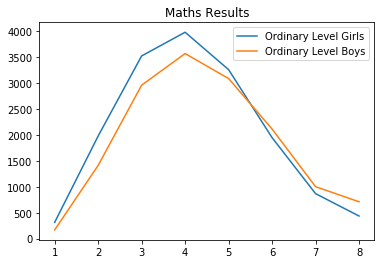

In [5]:
#Plotting grades for boys and girls
plt.title('Maths Results')
plt.plot(grade, fem_mat, label = 'Ordinary Level Girls')
plt.plot(grade, mal_mat, label = 'Ordinary Level Boys')
plt.legend()
plt.show()

In [6]:
# How many girls sat LCOL in 2018
totalgirl = (np.sum(fem_mat)).tolist()
print('The total number of female candidates: ', totalgirl)

The total number of female candidates:  [16310]


In [7]:
# How many boys sat LCOL in 2018
totalboy = (np.sum(mal_mat)).tolist()
print('The total number of male candidates: ', totalboy)

The total number of male candidates:  [15026]


In [8]:
# Total number of LCOL candidates
bestpupil = y.loc[:, '2018-total-maths']
sum_total = np.sum(bestpupil)

print('The total number of candidates: ', sum_total)

The total number of candidates:  31336


In [9]:
# Percentage of students achieving each grade
all_percents = pd.DataFrame(np.round(bestpupil/sum_total*100, decimals = 2))
c = pd.DataFrame(all_percents)
c.rename(index=str, columns={"2018-total-maths": "% of Candidates achieving each grade"})
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html

,% of Candidates achieving each grade
1,1.54
2,10.82
3,20.69
4,24.10
5,20.26
6,12.96
7,5.97
8,3.66


In [10]:
# Set x to be in the range 0 - 8
x = np.arange(0, 8)
#For rows 0 to 7 in female results, calculate %
bestgirl = (fem_mat.iloc[x])
f = pd.DataFrame(np.round(bestgirl/totalgirl*100, decimals= 2))
f.rename(index=str, columns={"2018-female-maths": "% of Females achieving each grade"})

,% of Females achieving each grade
1,1.93
2,12.13
3,21.61
4,24.41
5,19.99
6,11.94
7,5.32
8,2.67


In [11]:
#For rows 0 to 7 in female results, calculate %
bestboy = (mal_mat.iloc[x])
meanboy = np.round(bestboy/totalboy*100, decimals = 2)
m = pd.DataFrame(meanboy)
m.rename(index=str, columns={"2018-male-maths": "% of Males achieving each grade"})

,% of Males achieving each grade
1,1.12
2,9.40
3,19.70
4,23.76
5,20.55
6,14.07
7,6.67
8,4.73


As the data I have here, is ordinal and categorical, I can't calculate the mean. From my percentages above, and the fact my data is ordered by descending grade awards, I can see that the median grade for both female and male is an O4.

I will use this data to begin my simulation. I also plan to look at other variables that I know impact attainment and are measurable; attendance and amount of time spent studying. It is unlikely that raw data will be available publicly on those variables, and so I will be investigating summary statistics and fitting them to my dataset.

## Simulating Data

From my investigation I have categorical ordinal data, grades, divided by gender. I know exactly what percentage of girls and boys achieve each grade boundary. Results vary from year to year but from a quick examination of previous years results, these proportions are fairly typical of Leaving Cert Ordinary Level Maths Results. 

I will begin my simulation by generating categorical data in the form of grades awarded to 100 female and 100 male students. I will then assign the relevant gender based on the grade I have generated. 

The choice of equal numbers of male and female students may cause my simulation to vary from the original dataset, which had a marginally higher percentage of female students.

### Generating grades and assigning gender of candidates

In [4]:
#Seed the random number generator
#This should ensure the same data every time this simulation is run.
np.random.seed(42)

In [5]:
np.random.seed(42)
grades = ['O8', 'O7', 'O6', 'O5', 'O4', 'O3', 'O2', 'O1']
#Use percentages above to assign the correct proportion of each grade to male and female students.
fem_grades = np.random.choice((grades), 100, p=[ 3/100, 5/100, 12/100, 1/5, 24/100, 22/100, 12/100, 1/50])
mal_grades = np.random.choice((grades), 100, p=[ 5/100, 7/100, 14/100, 21/100, 24/100, 19/100, 9/100, 1/100])
#https://stackoverflow.com/questions/10803135/weighted-choice-short-and-simple
#https://stackoverflow.com/questions/3679694/a-weighted-version-of-random-choice

In [6]:
# Create dataframe df with female candidates result grades
df = pd.DataFrame(fem_grades, columns=['Result_grade'])
# Create dataframe df2 with male candidates result grades
df2 = pd.DataFrame(mal_grades, columns=['Result_grade'])
#Combining both datasets in same column of  df
#Note fem_grades will be found at index 0 - 99 and mal_grades now has index 100 - 199
df = df.append(df2, ignore_index=True)
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html

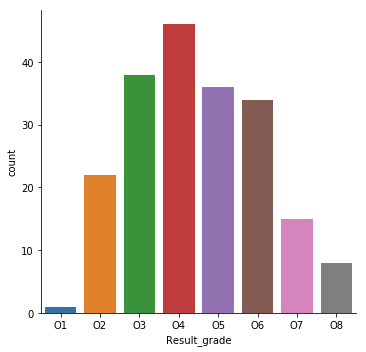

In [21]:
labels = ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']
sns.catplot(x="Result_grade", kind="count", data=df, 
            order = labels);
#https://seaborn.pydata.org/generated/seaborn.countplot.html

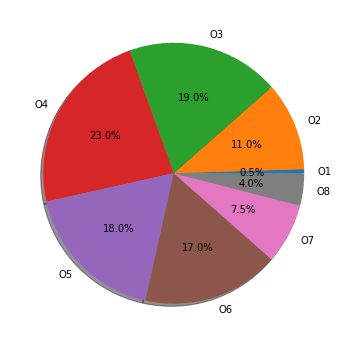

In [22]:
ax = plt.subplots(figsize = (8, 6))
sizes = df['Result_grade'].value_counts().sort_index()
ax = plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True);
plt.show()
#https://www.datacamp.com/community/tutorials/categorical-data

Now that I have 200 grades simulated for 100 female candidates and 100 male candidate, I need to assign my second variable, gender. 

By design, I know that my first 100 data points are female candidates and the second 100 are male. 

In [17]:
# Generating dfs with 100 strings, first female, then male
string_female = pd.DataFrame(['female']*100)
string_male = pd.DataFrame(['male']*100)
# Combining both dfs to the same df column, named gender
gender = string_female.append(string_male, ignore_index=True)

In [18]:
# Adding gender col to existing df
df['Gender'] = gender

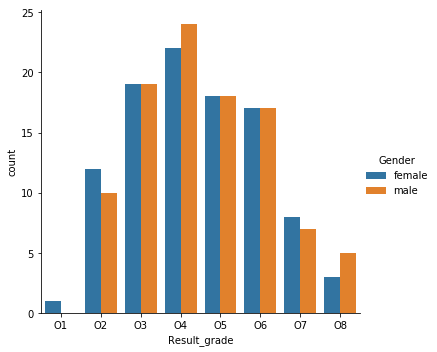

In [19]:
sns.catplot(x="Result_grade", hue="Gender",
                 data=df, kind="count", order = ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']);
#https://stackoverflow.com/questions/44067951/sorting-categorical-labels-in-seaborn-chart

### Generating results that fit the grade intervals

I know from my research that very often assessment results are normally distributed. That isn't the case at Leaving Cert Ordinary Level Maths. I initially tried to simulate my results with a normal distribution and found that I was getting either getting too many fails, and not enough 01 and O2 grades, or vice versa. 

To solve this problem, I began by generating grades and now that I have 200 grades I can work backward and generate each candidates marks. I know the grade boundaries for each of the eight grades awarded and I know that frequency of each grade in my simulation. 

In [17]:
#Printing the count for each grade in my df
pd.DataFrame(df['Result_grade'].value_counts().sort_index())

,Result_grade
O1,1
O2,22
O3,38
O4,46
O5,36
O6,34
O7,15
O8,8


I'm going to use the grade to generate a random mark in the interval for that grade. I've chosen to generate random marks from the Uniform Distribution. This is in part because there is no data on how marks are distributed across grade boundaries. 

I have changed one of the grade boundaries slighlty, so my results more closely resemble Leaving Cert results. The lowest grade O8 will contain marks from 60 to 179. I made this decision as in my professional research, it is extremely rare for a candidate to score lower than 60 marks in a Leaving Cert Ordinary Level Maths exam. 

In [21]:
#Create a new col, Result with zeros in each row
df['Result'] = np.zeros(200)

In [22]:
np.random.seed(42)
#Using the count and grade boundaries for each grade, I'm going to populate Result with uniformly distributed results
df['Result'].mask(df['Result_grade']=='O1', np.random.randint(540, 600, 1), inplace=True)
df['Result'].mask(df['Result_grade']=='O2', np.random.randint(480, 540, 22), inplace=True)
df['Result'].mask(df['Result_grade']=='O3', np.random.randint(420, 480, 38), inplace=True)
df['Result'].mask(df['Result_grade']=='O4', np.random.randint(360, 420, 46), inplace=True)
df['Result'].mask(df['Result_grade']=='O5', np.random.randint(300, 360, 36), inplace=True)
df['Result'].mask(df['Result_grade']=='O6', np.random.randint(240, 300, 34), inplace=True)
df['Result'].mask(df['Result_grade']=='O7', np.random.randint(180, 240, 15), inplace=True)
df['Result'].mask(df['Result_grade']=='O8', np.random.randint(60, 180, 8), inplace=True)
#https://stackoverflow.com/questions/49667026/mask-values-in-a-pandas-dataframe-based-on-condition
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mask.html

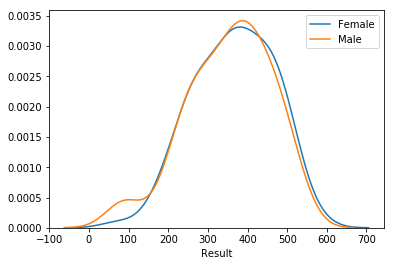

In [23]:
girls = df.loc[(df['Gender'] == 'female')]
boys = df.loc[(df['Gender'] == 'male')]

sns.distplot(girls['Result'], label = 'Female', hist=False);
sns.distplot(boys['Result'], label = 'Male', hist = False);
plt.legend();

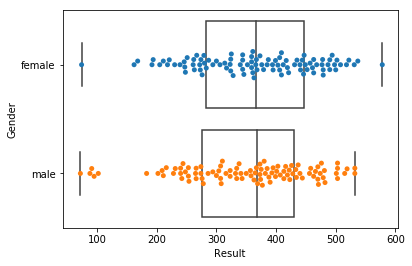

In [39]:
ax =sns.swarmplot(x='Result', y = 'Gender', data = df);
sns.boxplot(df['Result'], df['Gender'], ax = ax, 
            boxprops={'facecolor':'None'}, whiskerprops={'linewidth':0});
#https://seaborn.pydata.org/generated/seaborn.swarmplot.html

### Generating categorical data for how Leaving Certs spend their free time

Now that I have 200 results for students, I will start to add other variables that may or have been found to impact student attainment. 

The next variable I will examine is time spent studying versus other activities. 

In sixth year 60% of young women compared with 28% of young men report that they spend most of their free time studying. 

In [25]:
# Strings to represent the percentage of each
girls_study = (['study']*60)
girls_dont = (['other']*40)
boys_study = (['study']*28)
boys_dont = (['other']*72)

In [26]:
# Combining the four lists of strings into one dataframe, df_
df_ = pd.DataFrame({'Freetime':girls_study})
df3 = pd.DataFrame({'Freetime':girls_dont})
df_ = df_.append(df3, ignore_index=True)
np.random.RandomState(42)
df_ = df_.sample(frac=1)
#https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_.reset_index()

df3 = pd.DataFrame({'Freetime':boys_dont})
df4 = pd.DataFrame({'Freetime':boys_study})
df4 = df4.append(df3, ignore_index=True)
df4 = df4.sample(frac=1)
df4.reset_index()

df_ = df_.append(df4, ignore_index=True)
freetime = pd.Series(df_['Freetime'])

In [27]:
# Joining df_ to simulation df
df['Freetime'] = freetime.values

#https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list/38490727

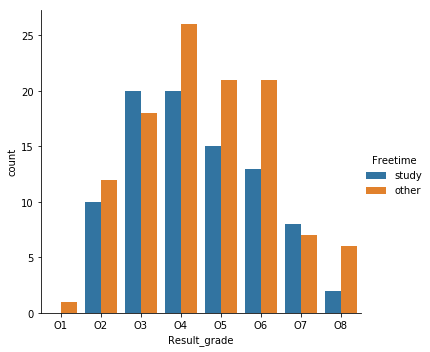

In [28]:
sns.catplot(x="Result_grade", hue="Freetime",
                 data=df, kind="count", order = ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']);

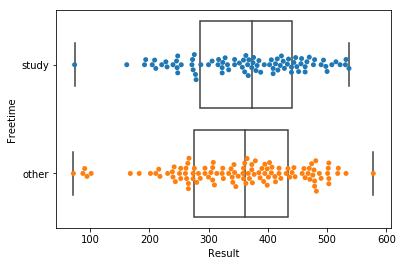

In [40]:
ax =sns.swarmplot(x='Result', y = 'Freetime', data = df);
sns.boxplot(df['Result'], df['Freetime'], ax = ax, 
            boxprops={'facecolor':'None'}, whiskerprops={'linewidth':0});

### Generating numerical data measuring attendance

According to the Tusla School Attendance report (2015/2016), the average number of days missed by post-primary school students is 7.9% of 167 days, which works out at 13 days. This number includes all year groups, and is an average of days missed for students from 1st to 6th Year. 

As a result, I was wary of using this figure. There are a wide range of factors influencing attendance, which can result in Leaving Cert students having better or worse attendance than Junior Cycle students. In the same report, 15% of students were reported to have missed 20 days or more, but we have no way of identifying if that 15% includes students from Junior Cycle or Senior Cycle, or both. 

As a result, I did some research of my own on the average number of days missed by Leaving Cert students. I discovered that between the start of 6th Year and 8th December, so the first term, a group of over 100 Leaving Certs had missed on average 7 days of school each. I'm afraid I can't share the data or my calculations here, but I can use this average to simulate the number of missed days for my cohort of 200 students. 

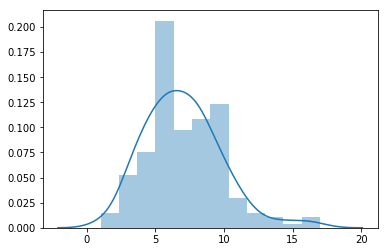

In [30]:
np.random.RandomState(42)
missed_days = pd.Series(np.random.poisson(7, 200))
sns.distplot(missed_days);
df['Missed_days'] = missed_days.values

I have used the Poisson distribution to model the number of days a student was absent. I chose this distribution as my data is numerical, discrete and I am aware of the average. 

I am using the distribution to calculate the number of days missed for a class of 200 students over the entire academic year. These events are independent, as the number of days one student misses is not impacted by another.  

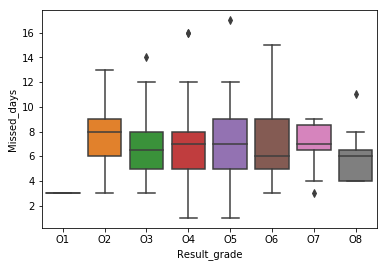

In [31]:
sns.boxplot(x = df['Result_grade'], y = df['Missed_days'], 
            order = ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8']);

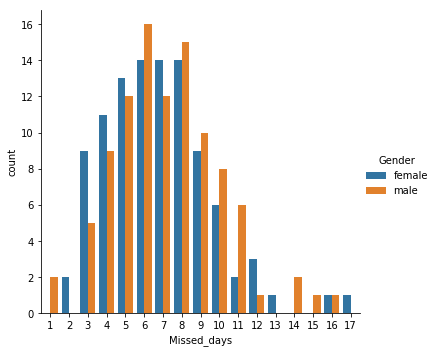

In [32]:
sns.catplot(x="Missed_days", hue="Gender",
                 data=df, kind="count");


An English study found pupils with no absence 2.8 times more likely to achieve 5+ GCSEs A*-C or equivalent including English and mathematics than pupils missing 15-20 per cent of KS4 lessons. However 15% of 167 days in the Irish school year is almost 25 days, which would be at the extreme end of absences in Irish schools. In fact based on my research and simulated data no student in my dataset would fall into this category. 

## Simulated Dataset

In [33]:
df

,Result_grade,Gender,Result,Freetime,Missed_days
0,O5,female,344.0,study,17
1,O2,female,531.0,study,3
2,O3,female,463.0,study,5
3,O4,female,409.0,study,7
4,O6,female,280.0,other,8
5,O6,female,267.0,other,3
6,O7,female,194.0,study,7
7,O2,female,508.0,study,10
8,O4,female,417.0,study,2
9,O3,female,449.0,study,5


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Result_grade    200 non-null object
Gender          200 non-null object
Result          200 non-null float64
Freetime        200 non-null object
Missed_days     200 non-null int32
dtypes: float64(1), int32(1), object(3)
memory usage: 7.1+ KB


In [35]:
df.describe()

,Result,Missed_days
count,200.00000,200.000000
mean,358.76500,6.995000
std,103.44022,2.813281
min,72.00000,1.000000
25%,278.75000,5.000000
50%,367.00000,7.000000
75%,440.00000,9.000000
max,578.00000,17.000000


### Problems Arising and Evaluation of Success

**Simulating Results:**
- I initially simulated my data using the np.random.normal function. I generated the data for each gender separately with the same standard deviation, and a slightly higher mean for girls who typically achieve higher grades in LCOL Maths. I ran this simulation and found that my results showed higher rates of failure and smaller numbers of students achieving the top grades of O1 and O2. Adjusting the parameters did not improve the accuracy of my results. 

- As a result I chose to generate categorial data in the form of grades O1 to O8 using the proportion of results from 2018. I used the porportions of male and female results to generate 100 grades for each gender and then combined them. Accounting for a discrepancy in the proportion of girls vs. boys, my data was now broadly in line with what I'd expect to see.

- Next, I assigned numerical marks based on the grade a student was awarded. I used uniformly generated data there is no public information on how marks are distributed across grades. 

At this stage, my simulated data technically had 3 variable: Gender, Results, and Grade.

**Generating Categorical Freetime data:** 
- Once data was generated, I plotted a swarmplot to see if it matched acccepted research. It didn't; students who spent most of free time studying were not more likely to achieve the highest grades, but they were less likely to fail. And students who didn't study were just as likely to get the highest grade.

- I wanted to find a way to match this data randomly, in such a way that students with the highest grade results would be more likely to spend most of their time studying.

**Generating Categorical Absenses data:**

- I used the Poisson distribution to simulate absences for my cohort of 200 students. I thought that I would have to fit my results to ensure students with better attendance achieve higher grades. However all research from other jurisdictions imply that Irish students have very good attendance, and there is no research that points to the range of absences in my dataset impeding attainment. 

- I did try to find local data on student attainment given attendance levels, but that data doesn't appear to be available. Thankfully much of Irish research is more concerned with student participation and school completion. As all Leaving Cert candidates are deemed to have completed school, that information was not relevant to my project.

## In Summary

## References

* [State Examinations Commission - Annual Exams Statistics](https://www.examinations.ie/statistics/?l=en&mc=st&sc=r11)
* [A Social Portrait of Children in Ireland](https://www.esri.ie/pubs/BKMNEXT097.pdf)
* [Tusla, School Attendance Data for Primary and Secondary School students(2015/2016)](https://www.tusla.ie/uploads/content/School_Attendance_Data_2015-16.pdf)
* [The link between absence and attainment at KS2 and KS4 2012/13 academic year, DfE Research Report](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/412638/The_link_between_absence_and_attainment_at_KS2_and_KS4.pdf)